In [8]:
import nltk
nltk.download('punkt')

import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#!conda install -c conda-forge jupyter_nbextensions_configurator

In [ ]:
!pip install docx2txt

In [ ]:
!pip install --upgrade pip --user

In [ ]:
!pip install Wordcloud

In [2]:
import docx2txt
my_text = docx2txt.process("twotier.docx")
#print(my_text)


# Cleaning the Text

In [3]:
import re


In [4]:
def clean_text(text):

    # remove HTML tags
    #text = re.sub(r'<.*?>', '', text)
    
    # remove the characters [\], ['] and ["]
    #text = re.sub(r"\\", "", text)    
    #text = re.sub(r"\'", "", text)    
    #text = re.sub(r"\"", "", text) 
    text = re.sub(r"\d", "", text) #This is to remove any digit from the text. 
    #text = re.sub(r"•\xa0", "", text) #This can be used to remove any text.
   # text = re.sub(r"\ufeff", "", text)
    #text = re.sub(r"\w","", text, flags = re.I) this is to remove all the word characters. The addition "flags = re.I" refers to case sensitive whether small or capital letters.
    #text = re.sub(r"\W", "", text, flags=re.I) The capital W function is used to remove all non-word characters. It removes also spaces as well.  
    #text = re.sub(r"[,@\'?\.$%_]", "", text, flags=re.I) #The square bracket [] solves this problem. 
    
    
    # convert text to lowercase
    text = text.strip().lower()
    #.strip() with no arguments (or None as the first argument) removes all whitespace at the start and end, including spaces, tabs, newlines and carriage returns
    
    # replace punctuation characters with spaces
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n \r'
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    return text

In [5]:

text1 = clean_text(my_text)
#text1

# pickling

In [ ]:
#import pickle
#with open('sent_analysis.pkl', 'wb') as pickle_file:
    #pickle.dump(text1, pickle_file)

#with open('data_pick.pkl', 'rb') as pickle_file:
    #new_data = pickle.load(pickle_file)
    
    # this is applied to open pickle file. 

# tokenization and stopwords

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))
#it is important to note that stopword funtion will only work with tokenized text.
#With simple text, it will not provide the desired results. 

179

In [11]:
stopwords = nltk.corpus.stopwords.words('english')

In [12]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
#text2 = "This is a sample sentence, showing off the stop words filtration."
  
stop_words = set(stopwords.words('english')) 
  
text2 = word_tokenize(text1) 
  
filtered_text = [w for w in text2 if not w in stop_words] 
  
#filtered_sentence = [] 
  
#for w in text2: 
    #if w not in stop_words: 
        #filtered_sentence.append(w) 
  
#print(text2) 
print(filtered_text)

#stopwords = nltk.corpus.stopwords.words('english')
#newStopWords = ['stopWord1','stopWord2']
#stopwords.extend(newStopWords)

['prevalent', 'two', 'tier', 'hrm', 'structures', 'pakistan', '’', 'education', 'sector', 'may', 'ask', 'demographics', 'regarding', 'experience', 'rank', 'number', 'academic', 'organizations', 'turnover', 'industry', 'experience', 'research', 'field', 'department', 'teaching', 'close', 'heart', 'since', 'child', 'joined', 'university', 'wah', 'lecturer', 'served', 'five', 'years', 'simultaneously', 'phd', 'back', 'joined', 'comsats', 'assistant', 'professor', 'research', 'field', 'cloud', 'computing', 'bio', 'informatics', 'told', 'belong', 'tts', 'may', 'ask', 'choose', '’', 'choose', 'tts', 'choice', 'advertisement', 'vacant', 'position', 'tts', '’', 'option', 'time', 'views', 'tts', 'chosen', 'tts', 'general', 'views', 'tts', 'doubt', 'good', 'system', 'hec', 'university', 'give', 'value', 'system', 'valuable', 'system', 'hec', 'admits', 'tts', 'faculty', 'productive', 'faculty', 'return', 'faculty', 'demand', 'something', 'might', 'monetary', 'non', 'monetary', 'rewards', 'good', 

In [13]:
text3 = filtered_text
text4 = [[word.lower() for word in line.split()] for line in text3]
text4

[['prevalent'],
 ['two'],
 ['tier'],
 ['hrm'],
 ['structures'],
 ['pakistan'],
 ['’'],
 ['education'],
 ['sector'],
 ['may'],
 ['ask'],
 ['demographics'],
 ['regarding'],
 ['experience'],
 ['rank'],
 ['number'],
 ['academic'],
 ['organizations'],
 ['turnover'],
 ['industry'],
 ['experience'],
 ['research'],
 ['field'],
 ['department'],
 ['teaching'],
 ['close'],
 ['heart'],
 ['since'],
 ['child'],
 ['joined'],
 ['university'],
 ['wah'],
 ['lecturer'],
 ['served'],
 ['five'],
 ['years'],
 ['simultaneously'],
 ['phd'],
 ['back'],
 ['joined'],
 ['comsats'],
 ['assistant'],
 ['professor'],
 ['research'],
 ['field'],
 ['cloud'],
 ['computing'],
 ['bio'],
 ['informatics'],
 ['told'],
 ['belong'],
 ['tts'],
 ['may'],
 ['ask'],
 ['choose'],
 ['’'],
 ['choose'],
 ['tts'],
 ['choice'],
 ['advertisement'],
 ['vacant'],
 ['position'],
 ['tts'],
 ['’'],
 ['option'],
 ['time'],
 ['views'],
 ['tts'],
 ['chosen'],
 ['tts'],
 ['general'],
 ['views'],
 ['tts'],
 ['doubt'],
 ['good'],
 ['system'],
 ['hec

# stemming

In [14]:
from nltk.stem import PorterStemmer
ps = nltk.PorterStemmer()

In [15]:
def stem_text(text):
    text = "".join([word.lower() for word in text if word not in text])
    text = [ps.stem(word) for word in filtered_text]    
    return(text)

In [16]:
stem_text(text4)
text5 = stem_text(text4)
text5[0:20]
len(text5)

12072

# Count Vectorization


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [text4]
vectorizer = CountVectorizer(analyzer = stem_text)
X_counts = vectorizer.fit_transform(corpus)
#print(X_counts.shape)
#print(vectorizer.get_feature_names())
#print(X_counts.toarray())

In [18]:
X_counts

<1x1248 sparse matrix of type '<class 'numpy.int64'>'
	with 1248 stored elements in Compressed Sparse Row format>

In [19]:
X_counts.toarray()

array([[  1,   1,   1, ..., 254,   2,   2]], dtype=int64)

In [20]:
pd.DataFrame(X_counts.toarray())

,0,1,2,3,4,5,6,7,8,9,...,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247
0,1,1,1,6,2,1,2,19,6,5,...,1,86,1,8,1,2,1,254,2,2


In [21]:
X_counts_df = pd.DataFrame(X_counts.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247
0,1,1,1,6,2,1,2,19,6,5,...,1,86,1,8,1,2,1,254,2,2


In [ ]:

X_counts_df.columns

In [ ]:
X_counts_df.info

# N-Gram Vectorization

In [79]:
#text4

In [26]:
tokens=text4

In [27]:
tokens_nltk = nltk.Text(tokens)

In [29]:
#conc1 = tokens_nltk.concordance("laughter")

In [ ]:
Data Frames

In [72]:
tokens2=pd.DataFrame(tokens)
tokens2.columns=['Words']
tokens2.head()

,Words
0,prevalent
1,two
2,tier
3,hrm
4,structures


In [31]:
tokens2.info


<bound method DataFrame.info of                Words
0          prevalent
1                two
2               tier
3                hrm
4         structures
5           pakistan
6                  ’
7          education
8             sector
9                may
10               ask
11      demographics
12         regarding
13        experience
14              rank
15            number
16          academic
17     organizations
18          turnover
19          industry
20        experience
21          research
22             field
23        department
24          teaching
25             close
26             heart
27             since
28             child
29            joined
...              ...
12042            hrm
12043      regarding
12044            tts
12045  organizations
12046   institutions
12047            hec
12048          aware
12049            yes
12050      obviously
12051           know
12052         issues
12053     strategies
12054        control
12055            job
12

In [ ]:
tokens2.describe

In [74]:
# 1. word count 
tokens2.Words.value_counts().head(30)

knowledge        446
tts              418
’                254
employees        174
bps              173
research         142
university       139
job              124
two              105
one               94
know              94
faculty           93
tier              91
turnover          86
system            84
issues            83
experience        80
share             77
hec               72
universities      71
organizations     69
years             67
comsats           65
conflict          63
good              63
mentioned         61
like              60
yes               60
also              59
pay               57
Name: Words, dtype: int64

In [41]:
# conda install -c conda-forge textblob
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
wc = WordCloud(stopwords=stop_words, background_color= "white", colormap="Dark2", max_font_size=100, random_state=42)

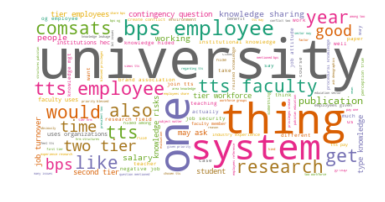

In [77]:


wc.generate(text1)

# store to file
#wc.to_file(path.join(d, "alice.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
#plt.figure()
#plt.imshow(alice_mask,cmap=plt.cm.gray, interpolation='bilinear') #alice_mask,
#plt.axis("off")
plt.show()

In [ ]:
#Count Vectorizer
#Count Vectorizer is a useful technique used to measure to the number of counts of a word in a vector.
#It also helps to divide the data into training and a testing set. 

In [63]:
#requirements
#import nltk
#import pandas as pd
#import numpy as np
#import re
#import string
#pd.set.option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()



In [66]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [text1]
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(corpus)


In [71]:
print(X_counts.shape)
print(vectorizer.get_feature_names())
print(X_counts.toarray())

(1, 1817)
['abandon', 'abbottabad', 'abilities', 'able', 'about', 'abroad', 'absence', 'absolutely', 'academia', 'academic', 'academics', 'accept', 'accepted', 'accepting', 'accessible', 'accident', 'accomplish', 'according', 'account', 'achieve', 'achieved', 'across', 'act', 'action', 'active', 'activities', 'actual', 'actually', 'ad', 'add', 'adding', 'additional', 'addressed', 'admin', 'administration', 'administrative', 'administratively', 'admire', 'admits', 'adopt', 'adopted', 'advanced', 'advancement', 'advancements', 'advertisement', 'affect', 'after', 'afterwards', 'again', 'against', 'age', 'ago', 'agree', 'ahead', 'algebra', 'algorithms', 'aliens', 'all', 'allah', 'allama', 'allow', 'allowance', 'allowances', 'allowed', 'almost', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amount', 'an', 'analysis', 'and', 'announced', 'annoys', 'annual', 'another', 'answer', 'anxiety', 'any', 'anyone', 'anything', 'apart', 'applicable', 'applying', 'appointed', 'approv

In [ ]:
with open('sent_analysis.pkl', 'rb') as pickle_file:
    new_data = pickle.load(pickle_file)
    
    # this is applied to open pickle file.

In [ ]:
new_data

In [ ]:
#conda install -c conda-forge textblob
from textblob import TextBlob

In [ ]:
TextBlob(new_data).sentiment